<a href="https://colab.research.google.com/github/egonik-unlp/tp_curso_ml/blob/main/src/protein_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/egonik-unlp/tp_curso_ml.git

Cloning into 'tp_curso_ml'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 36 (delta 9), reused 35 (delta 8), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from datetime import datetime
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_name=datetime.strftime(datetime.now(), '%d-%m_%H-%M')
os.mkdir('/content/drive/MyDrive/protein_classifier/{}'.format(folder_name))

In [3]:
%cd /content/tp_curso_ml/src/
npzfile=np.load('pickle/preprocessed_data.npz')
data, labels=npzfile.values()
print(data.shape, labels.shape)

/content/tp_curso_ml/src
(2200, 1500) (2200, 1)


In [4]:
data_one_array=np.hstack([node.reshape(-1,1) for node in data]).T
data_one_array.shape, labels.shape

((2200, 1500), (2200, 1))

In [5]:
X_tv, X_test, t_tv, t_test=train_test_split(data_one_array, labels, test_size=.2, random_state=42)
X_train, X_val, t_train, t_val=train_test_split(X_tv, t_tv, test_size=.2, random_state=42)

## Problema de list-of-lists

Para ver si se soluciona el problema de 
```python
ValueError: Data cardinality is ambiguous:
  x sizes: 1500
  y sizes: 999
Make sure all arrays contain the same number of samples.
```

Voy a tomar cada nodo del array, lo voy a rotar y voy a hacer un hstack

In [6]:
X_train_ohe=to_categorical(X_train)
X_val_ohe=to_categorical(X_val)
X_test_ohe=to_categorical(X_test)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1500, 26)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1494, 64)     11712       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 747, 64)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
dense (Dense)                   (None, 747, 128)     8320        max_pooling1d[0][0]              
______________________________________________________________________________________________

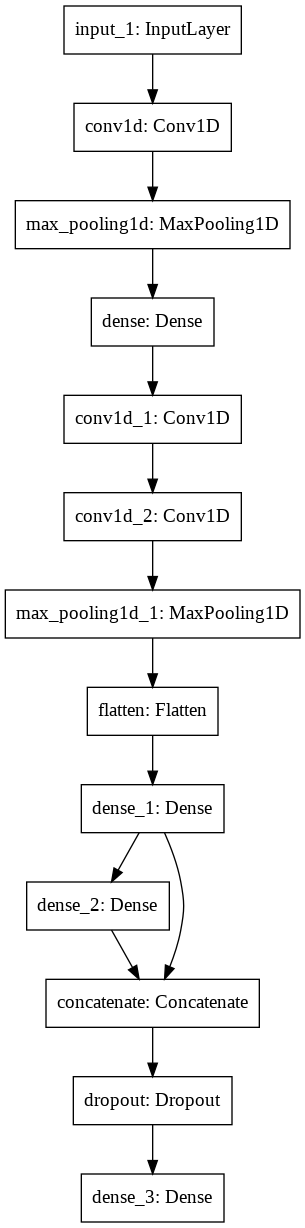

In [78]:
keras.backend.clear_session()


input_=keras.layers.Input(shape=X_train_ohe.shape[1:])

conv1=keras.layers.Conv1D(filters=64, kernel_size=7)(input_)
pool1=keras.layers.MaxPool1D(pool_size=2)(conv1)


dense_intermediate=keras.layers.Dense(units=128, activation='relu')(pool1)



conv3=keras.layers.Conv1D(filters=128, kernel_size=3)(dense_intermediate)
conv4=keras.layers.Conv1D(filters=128,kernel_size=3)(conv3)
pool2=keras.layers.MaxPool1D(pool_size=2)(conv4)



flatten=keras.layers.Flatten()(pool2)


dense1=keras.layers.Dense(units=128, activation='relu')(flatten)
dense2=keras.layers.Dense(units=64, activation='relu')(dense1)

concat=keras.layers.concatenate([dense1, dense2])

dropout1=keras.layers.Dropout(.5)(concat)




output=keras.layers.Dense(1, activation='sigmoid')(dropout1)
model= keras.models.Model(inputs=[input_], outputs=[output])



model.summary()
keras.utils.plot_model(model)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1500, 26)]   0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1496, 64)     8384        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1494, 64)     11712       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1498, 64)     5056        input_1[0][0]                    
______________________________________________________________________________________________

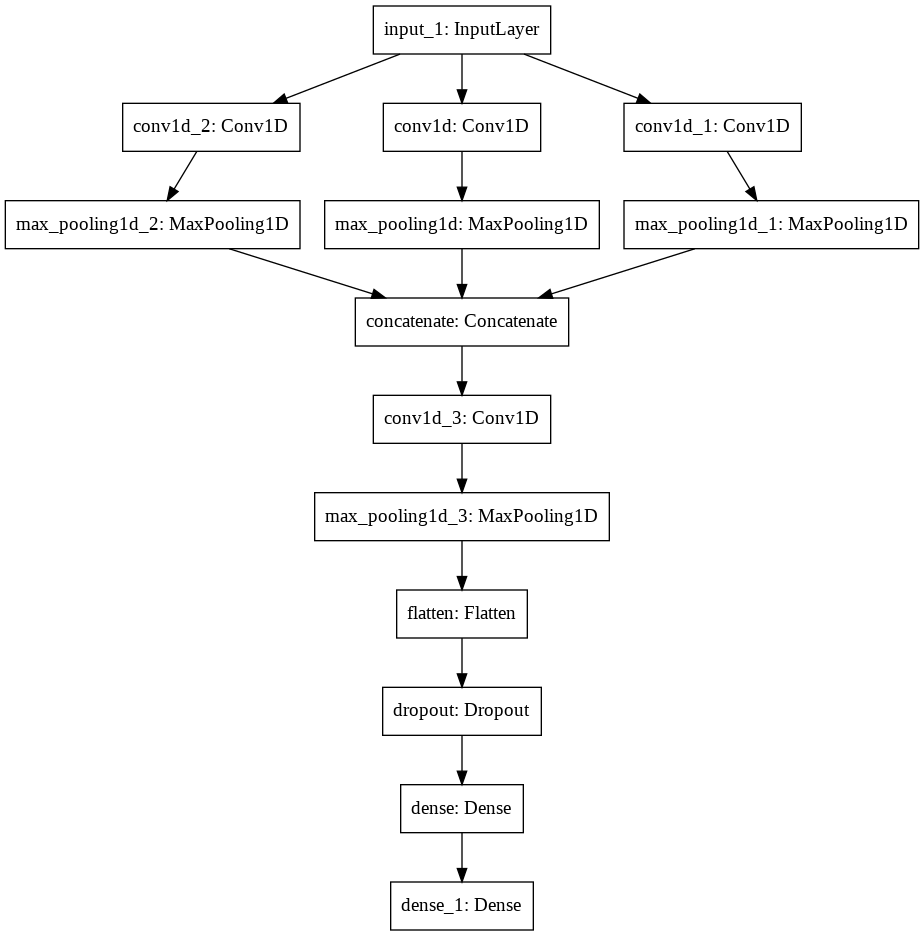

In [107]:
### Trato de hacer capas convolucionales paralelas



keras.backend.clear_session()


input_=keras.layers.Input(shape=X_train_ohe.shape[1:])

convp11=keras.layers.Conv1D(filters=64, kernel_size=7)(input_)
poolp1=keras.layers.MaxPooling1D(4)(convp11)

convp21=keras.layers.Conv1D(filters=64, kernel_size=3)(input_)
poolp2=keras.layers.MaxPooling1D(4)(convp21)

convp31=keras.layers.Conv1D(filters=64, kernel_size=5)(input_)
poolp3=keras.layers.MaxPooling1D(4)(convp31)




concat_2_conv=keras.layers.concatenate([poolp3,poolp1, poolp2], axis=1)


conv2=keras.layers.Conv1D(filters=128, kernel_size=5)(concat_2_conv)
pools1=keras.layers.MaxPooling1D(8)(conv2)
flatten=keras.layers.Flatten()(pools1)

dropout0=keras.layers.Dropout(.5)(flatten)

dense=keras.layers.Dense(units=128, activation='relu')(dropout0)

dropout1=keras.layers.Dropout(.5)(dense)

# flatten_input=keras.layers.Flatten()(input_)

# concat=keras.layers.concatenate([flatten_input, dropout1])

output=keras.layers.Dense(1, activation='sigmoid')(dense)
model= keras.models.Model(inputs=[input_], outputs=[output])



model.summary()
keras.utils.plot_model(model)

In [100]:
## Empecemos de nuevo con un modelo simple


keras.backend.clear_session()



input=keras.layers.Input(shape=X_train_ohe.shape[1:])

conv1=keras.layers.Conv1D(filters=32, kernel_size=7)(input) #stride?
pool1=keras.layers.MaxPooling1D(pool_size=2)(conv1)

conv2=keras.layers.Conv1D(filters=64, kernel_size=3)(pool1)
conv3=keras.layers.Conv1D(filters=64, kernel_size=3)(conv2)
pool2=keras.layers.MaxPool1D(pool_size=4)(conv3)

dropout=keras.layers.Dropout(.5)(pool2)

flatten=keras.layers.Flatten()(dropout)
dense1=keras.layers.Dense(128, activation='relu')(flatten)

output=keras.layers.Dense(1, activation='sigmoid')(dense1)

model=keras.models.Model(inputs=[input], outputs=[output])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1500, 26)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1494, 32)          5856      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 747, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 745, 64)           6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 743, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 185, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 185, 64)           0     

In [108]:
folder_name=datetime.strftime(datetime.now(), '%d-%m_%H-%M')
os.mkdir('/content/drive/MyDrive/protein_classifier/{}'.format(folder_name))

earlystoppingcb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint=keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/protein_classifier/{}/checkpoint.h5'.format(folder_name),save_best_only=True)

In [109]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [110]:
history=model.fit(X_train_ohe, t_train, epochs=1300,batch_size=32, callbacks=[earlystoppingcb, checkpoint], validation_data=(X_val_ohe, t_val))

Epoch 1/1300
44/44 [==============================] - 2s 19ms/step - loss: 0.6790 - accuracy: 0.5604 - val_loss: 0.6475 - val_accuracy: 0.6733
Epoch 2/1300
44/44 [==============================] - 1s 15ms/step - loss: 0.6662 - accuracy: 0.6307 - val_loss: 0.6382 - val_accuracy: 0.6591
Epoch 3/1300
44/44 [==============================] - 1s 15ms/step - loss: 0.6589 - accuracy: 0.6207 - val_loss: 0.6418 - val_accuracy: 0.6506
Epoch 4/1300
44/44 [==============================] - 1s 15ms/step - loss: 0.6539 - accuracy: 0.6314 - val_loss: 0.6348 - val_accuracy: 0.6534
Epoch 5/1300
44/44 [==============================] - 1s 15ms/step - loss: 0.6531 - accuracy: 0.6307 - val_loss: 0.6284 - val_accuracy: 0.6562
Epoch 6/1300
44/44 [==============================] - 1s 15ms/step - loss: 0.6507 - accuracy: 0.6321 - val_loss: 0.6251 - val_accuracy: 0.6619
Epoch 7/1300
44/44 [==============================] - 1s 15ms/step - loss: 0.6388 - accuracy: 0.6470 - val_loss: 0.6258 - val_accuracy: 0.6506

In [111]:
from sklearn.metrics import roc_curve, plot_roc_curve
pred_proba_no_skill=[0 for val in X_val_ohe]
pred_proba=model.predict(X_val_ohe)

fprns, tprns, threshns = roc_curve(t_val, pred_proba_no_skill)
fpr, tpr, thresh = roc_curve(t_val, pred_proba)

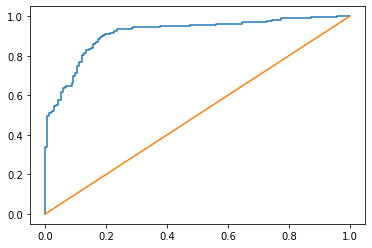

In [112]:
plt.plot(fpr, tpr)
plt.plot(fprns, tprns, ls='-')